# Vending Machine Sales Data
The dataset contains record of transactions from vending machines placed in different locations in Central New Jersey.<br>There are 9,618 records, each one corresponding to an individual product purchased from these machines. 

To begin the analysis I will consider the following questions:
- Which specific vending machine locations had the highest cumulative sales?
- Which products had the highest total sales across all vending machines?
- Which product categories were the most popular overall?

In [381]:
#Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
from matplotlib import pyplot as plt

#Import dataset
df = pd.read_csv("vending_machine_sales.csv")

### Cleaning the data:
In this section I will look at the data I am working with, and clean up the columns. 

In [382]:
df.describe()

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
count,9.617000e+03,9617.000000,9617.000000,9617.000000,9617.000000,9614.000000,9617.000000,9617.000000,9617.000000
mean,1.538223e+10,132.982011,1.958251,1.014766,132.982011,1.958394,1.014766,1.985520,2.220469
std,4.403263e+08,13.356722,0.698608,0.127330,13.356722,0.698670,0.127330,0.744244,1.084523
min,1.451578e+10,110.000000,1.000000,1.000000,110.000000,1.000000,1.000000,1.000000,1.000000
25%,1.503952e+10,122.000000,1.500000,1.000000,122.000000,1.500000,1.000000,1.500000,1.500000
50%,1.538346e+10,138.000000,1.500000,1.000000,138.000000,1.500000,1.000000,1.500000,2.000000
75%,1.573892e+10,144.000000,2.500000,1.000000,144.000000,2.500000,1.000000,2.500000,2.750000
max,1.617733e+10,165.000000,5.000000,3.000000,165.000000,5.000000,3.000000,8.000000,9.000000


In [383]:
df.dtypes

Status          object
Device ID       object
Location        object
Machine         object
Product         object
Category        object
Transaction      int64
TransDate       object
Type            object
RCoil            int64
RPrice         float64
RQty             int64
MCoil            int64
MPrice         float64
MQty             int64
LineTotal      float64
TransTotal     float64
Prcd Date       object
dtype: object

In [384]:
#Converting TransDate field to datetime64 type
df['TransDate'] = pd.to_datetime(df['TransDate'])

In [385]:
df.columns

Index(['Status', 'Device ID', 'Location', 'Machine', 'Product', 'Category',
       'Transaction', 'TransDate', 'Type', 'RCoil', 'RPrice', 'RQty', 'MCoil',
       'MPrice', 'MQty', 'LineTotal', 'TransTotal', 'Prcd Date'],
      dtype='object')

In [386]:
#Removing columns I don't plan to work with
del df['Status']
del df['RCoil']
del df['RQty']
del df['MCoil']
del df['Prcd Date']

In [387]:
df.columns

Index(['Device ID', 'Location', 'Machine', 'Product', 'Category',
       'Transaction', 'TransDate', 'Type', 'RPrice', 'MPrice', 'MQty',
       'LineTotal', 'TransTotal'],
      dtype='object')

# Analysis and insights:

### Cumulative sales per vending machine location

In [388]:
#Create a data frame for each vending machine ID
df_gutten_plans = df[df['Device ID'] == 'VJ300320609']
df_public_library = df[df['Device ID'] == 'VJ300320692']
df_mall_zales = df[df['Device ID'] == 'VJ300205292']
df_mall_att = df[df['Device ID'] == 'VJ300320611']
df_earle_asphalt = df[df['Device ID'] == 'VJ300320686']

In [389]:
#Sort transactions for each vending machine by ascending date
df_gutten_plans = df_gutten_plans.sort_values(by='TransDate')
df_public_library = df_public_library.sort_values(by='TransDate')
df_mall_zales = df_mall_zales.sort_values(by='TransDate')
df_mall_att = df_mall_att.sort_values(by='TransDate')
df_earle_asphalt = df_earle_asphalt.sort_values(by='TransDate')

In [390]:
#Calculate cumulative sum of sales for each vending machine
df_gutten_plans['CumulativeTotal'] = df_gutten_plans['TransTotal'].cumsum()
df_public_library['CumulativeTotal'] = df_public_library['TransTotal'].cumsum()
df_mall_zales['CumulativeTotal'] = df_mall_zales['TransTotal'].cumsum()
df_mall_att['CumulativeTotal'] = df_mall_att['TransTotal'].cumsum()
df_earle_asphalt['CumulativeTotal'] = df_earle_asphalt['TransTotal'].cumsum()

Text(0.5, 1.0, 'Cumulative Sales per Machine')

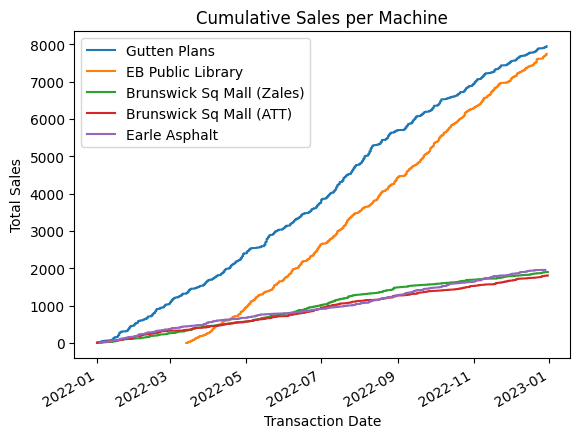

In [391]:
#Plot cumulative sales for each vending machine
ax = df_gutten_plans.plot(x = 'TransDate', y = 'CumulativeTotal', label='Gutten Plans')
df_public_library.plot(ax=ax, x = 'TransDate', y = 'CumulativeTotal', label='EB Public Library')
df_mall_zales.plot(ax=ax, x = 'TransDate', y = 'CumulativeTotal', label='Brunswick Sq Mall (Zales)')
df_mall_att.plot(ax=ax, x = 'TransDate', y = 'CumulativeTotal', label='Brunswick Sq Mall (ATT)')
df_earle_asphalt.plot(ax=ax, x = 'TransDate', y = 'CumulativeTotal', label='Earle Asphalt')

ax.set_xlabel('Transaction Date')
ax.set_ylabel('Total Sales')
ax.set_title("Cumulative Sales per Machine")

From the above line graph, it can be seen that cumulative sales were highest for the machines at Gutten Plans (Frozen dough specialist company) and EB Public Library. Cumulative sales were lowest for both of the shopping mall vending machines and Earle Asphalt (construction engineering firm). 

From these results, we can conclude that sales are likely to be highest when vending machines are placed in locations where people may spend an extended amount of time in one place (for example, studying in a library, or working a shift). People briefly passing by a shopping mall vending machine may be less likely to engage with it. As well, there may be more surrounding competition in shopping malls, as they typically have many snack options. As Gutten Plans and Earle Asphalt are both workplaces, it is unclear why the Earle Asphalt machine had much lower cumulative sales. It's possible that employees at Earle Asphalt may have more flexibility to seek out other options during the workday, or that they have a greater number of other local snack options. 

### 10 products with highest total sales in dollars

In [392]:
#Sum total sales in dollars for each product 
SalesPerProduct = df.groupby('Product', as_index=False).agg({'RPrice':'sum'})
print(SalesPerProduct)

                                        Product  RPrice
0         Autumns Granola Bar - Cinnamon Almond   36.00
1                 Bai Antioxidant - Brasilia BB   12.75
2             Bai Antioxidant - Kula Watermelon   13.75
3      Bai Antioxidant - Kupang strawberry kiwi   35.75
4             Bai Antioxidant - Molokai Coconut   30.00
..                                          ...     ...
179     Vitamin Water - XXX Acai BB Pomegranate   46.75
180              Wonderful Pistachios - Variety  384.00
181                   Zevia Organic Tea - Peach   10.00
182    Zevia Zero Calorie Energy - Mango Ginger   15.00
183  Zone Perfect - Chocolate Chip Cookie Dough    8.00

[184 rows x 2 columns]


In [393]:
#Rename RPrice to SalesPerProduct
SalesPerProduct = SalesPerProduct.rename(columns={'RPrice': 'TotalSales'})

#Sort SalesPerProduct to find the 10 products with highest sales, in dollars
SalesPerProduct = SalesPerProduct.sort_values(by='TotalSales',ascending=False)

#Display top 10 products with highest sales
SalesPerProduct = SalesPerProduct.head(10)
print(SalesPerProduct)

                                 Product  TotalSales
87               Monster Energy Original     1552.00
40                Coca Cola - Zero Sugar      964.50
131                  Red Bull - Original      808.50
108                 Poland Springs Water      681.00
69                 KitKat - Crisp Wafers      574.00
39                   Coca Cola - Regular      546.00
163  Starbucks Doubleshot Energy - Mocha      467.00
180       Wonderful Pistachios - Variety      384.00
170                Sunkist Soda - Orange      381.50
153              Snapple Tea - Raspberry      350.75


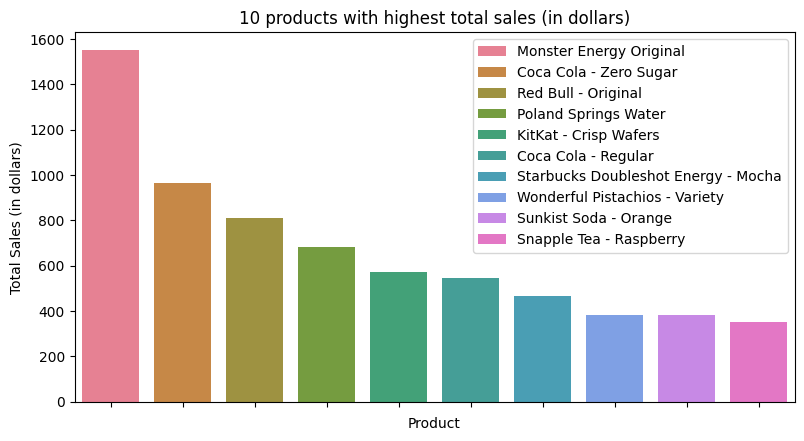

In [400]:
#Plot 10 products with highest total sales
colors = sns.color_palette("husl", 10)
ax = sns.barplot(y="TotalSales", x="Product", data=SalesPerProduct, hue="Product", legend='full', palette=colors)
ax.set_title("10 products with highest total sales (in dollars)")
ax.set(ylabel='Total Sales (in dollars)')
ax.set(xticklabels=[]);
plt.subplots_adjust(right=1.25);
ax.legend();

From the above graph, it can be seen that 5 out of the 10 products with highest sales were energy drinks/caffeinated beverages.
The other 5 most popular products were beverages (water, orange soda, raspberry tea) and small snacks (KitKat wafers and pistachios). 
It can be concluded that the primary purpose of a vending machine for many is to provide a quick "pick-me-up" in the form of an energy drink, or a small snack/beverage. 

### Product category with highest number of sales total

In [396]:
#Get count for each category of product:
SalesPerCat = df.groupby(['Category'])['Category'].count()
print(SalesPerCat)

Category
Carbonated        2377
Food              5293
Non Carbonated    1023
Water              657
Name: Category, dtype: int64


In [397]:
#Convert series SalesPerCat to dataframe
SalesPerCat = pd.DataFrame({'Category':SalesPerCat.index, 'Count':SalesPerCat.values})

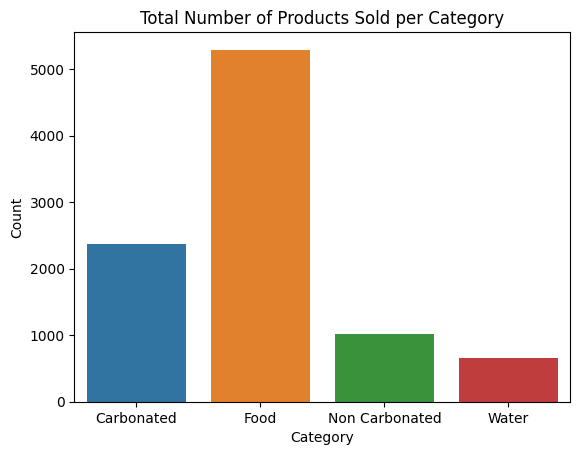

In [399]:
SalesPerCat = sns.barplot(x="Category", y="Count", data=SalesPerCat, hue="Category");
SalesPerCat.set_title("Total Number of Products Sold per Category");

Although 8 of the 10 products with highest total sales were beverages, from this graph we can conclude that the overall category with the highest number of individual products sold were food items. In addition to stocking machines with popular beverages and energy drinks, each machine should also offer a variety of food items to draw higher engagement from customers. 